# Graphes avec Dijkstra et A*

Présenté par Hugo THOLLON, Nicolas HO, Naria SAVARY

## Introduction

A mesure que la technologie a évolué, et avec elle la mobilité de l'humanité, puis des individus. Cette mobilité accrue a amené de nouveaux problèmes. Là où, à une époque, monsieur et madame tout le monde n'allaient pas plus loin que la boulangerie du village, avec l'accès à la mobilité, notamment depuis la généralisation de l'automobile, les réseaux routiers se sont complexifiés, créant un besoin de trouver des chemins de plus en plus complexe, de plus en plus rapidement. Ainsi, les techniques qui servaient à choisir les routes ont dû évoluer, et avec l'ère de l'informatique, ces techniques sont devenus des algorithmes qui ont dû être optimisés pour satisfaire les exigences croissantes du réseau routier et de ses usagers.

Dans ce rapport nous allons présenter certains de ces algorithmes en commençant par l'algorithme de Dijkstra puis une de ses dérivée appelée A*. Nous finirons ce rapport en présentant HPA* (Hierarchical Pathfinding A*) une amélioration possible de A*.  

## Installation

Avant de commencer ce rapport, nous vous invitons a créer un environnement virtuel Python, l'activer et installer les librairies suivantes :

```bash
python3 -m venv .venv
source .venv/bin/activate  # Linux/macOS
.venv\Scripts\activate     # Windows

pip install pandas pandas-stubs

pip install haversine

pip install osmnx

pip install scikit-learn

pip install matplotlib

pip install types-networkx

pip install ipympl
```

## Dijkstra

### Présentation

_D'après Wikipedia_, l'algorithme de Dijkstra permet de résoudre le problème du plus court chemin. Ce problème a plusieurs variantes. La plus simple est la suivante : étant donné un graphe non-orienté, dont les arêtes sont munies de poids, et deux sommets de ce graphe, trouver un chemin entre les deux sommets dans le graphe, de poids minimum. L'algorithme de Dijkstra permet de résoudre un problème plus général : le graphe peut être orienté, et l'on peut désigner un unique sommet, et demander d'avoir la liste des plus courts chemins pour tous les autres nœuds du graphe.

Dans un graphe, le poids d’une arête représente la “coût” associé au passage entre deux sommets. Ce coût peut modéliser de nombreuses choses selon le contexte du problème : 
- une distance géographique, 
- un temps de trajet, 
- une consommation d’énergie, 
- un prix, 
- une difficulté.

L’algorithme de Dijkstra cherche alors à minimiser la somme de ces coûts. Choisir ce que représente le poids revient à définir ce que l’on veut optimiser dans le chemin trouvé.

Nous allons utiliser le terme **g(n)** pour parler de la **somme des poids des arêtes entre le nœud de départ D et n un nœud du graphe**. Il peut exister plusieurs chemins entre D et n. g(n) fait réference au chemin avec le plus petit poids découvert pour l'instant.

Dans l'algorithme de Dijkstra, les poids sont forcément positifs. Pour des poids négatifs il est préferable d'utiliser l'[algorithme de Bellman-Ford](https://fr.wikipedia.org/wiki/Algorithme_de_Bellman-Ford) dont nous ne parlerons pas ici.  

Dans nos implémentations et pour cette présentation, nous considèrerons que les **graphes sont non-orientés** et que les **poids** représentent la **distance en mètre** entre 2 nœuds.

### Explication avec un exemple

#### Théorie

Dans cette présentation, nous allons utiliser le graphe suivant pour expliquer le fonctionnement de Dijkstra et A* : 

<center>

<img src="./assets/graph_example_without_weight.png" alt="image du graphe d'exemple" style="background-color:white; max-width:300px;" />

_**figure 1:** graphe d'exemple_

</center>

Dans ce graphe, nous avons représenté le poids de chaque arête. Au fur et à mesure que nous compléterons le graphe nous remplacerons **00** par la valeur de g(n).

Il est possible d'exécuter l'algorithme de Dijkstra avec un tableau :  
Chaque étape correspond à une ligne.  
Une **ligne** donne les distances des sommets depuis le sommet de départ (càd le **poids des nœuds**).  
Une **colonne** donne l'évolution de g(n) d'un nœud n.  

**A chaque étape** (Sur chaque ligne), le nœud avec le plus petit g(n) est **choisi** et souligné.  
**A l'étape suivante** le g(n) des nœuds adjacent (___na___) au nœud choisi (___nc___) sont recalculés comme suit :

<center>

___g(na)___ = ___g(nc)___ + ___Poids Arête entre na et nc___

</center>

Dans le tableau, si le nouveau ___g(na)___ est inférieur à la valeur de **g(na)** déjà présente, l'ancien g(na) est remplacé par le nouveau.

Une fois un nœud n choisi, il ne peut plus être choisi. Pour rendre le tableau plus lisible, son g(n) dans le tableau est remplacé par **-**.

Si g(n) n'est pas encore connu pour un nœud n, g(n) est noté ∞ (infini).

L'algorithme s'arrête quand le nœud choisi est le nœud d'arrivée ou si tous les nœuds ont déjà été explorés.

#### Pratique

Pour montrer le fonctionnement de l'algorithme vous trouverez en dessous un GIF déroulant l'algorithme étape par étape avec le graphe présenté dans la figure 1 et un tableau qui s'actualise comme décrit dans la partie théorie.

Le code couleur du GIF est le suivant : 
- <span style="color:#CCFF99">Vert clair</span> : Départ.
- <span style="color:#66B2FF">Bleu</span> : Nœud découvert (càd que l'algorithme peut choisir) qui n'ont pas encore été choisis.
- <span style="color:#FF9999">Rouge rosé</span>/<span style="color:#E5CCFF">Rose-violet</span> : Arrivée avant et après avoir été découverte.
- <span style="color:#FFFF00">Jaune</span> : Le nœud choisi à une étape N.
- <span style="color:#00FF00">Vert</span> : Chemin final le plus court entre A et J.

<center>

<img src="./assets/dijkstra_steps.gif" alt="GIF expliquant l'algorithme de Dijkstra en plusieurs étapes" style="background-color:white; max-width:500px;" />

_**figure 2:** GIF expliquant l'algorithme de Dijkstra en plusieurs étapes_

</center>

Pour visualiser chaque étapes individuellement (sans le GIF) vous pouvez aller dans `./assets/dijkstra_steps/` et visualiser chaque image. 


### Le problème de Dijkstra

Bien que l'algorithme de Dijkstra soit très pratique pour trouver le chemin le plus court, il possède plusieurs limitations, la plus importante étant sa vitesse d'execution.  
En effet, l'algorithme va explorer toutes les directions pour trouver le chemin plus court, cela va entraîner l’exploration de nombreux chemins inutiles (ex: qui s'éloignent de la cible) avant d’atteindre l’arrivée.  
Explorer ces nœuds inutiles prend de la puissance du calcul et fait donc perdre du temps. On est alors en droit de se poser la question suivante :  
<center>

**Y a-t-il une solution pour éviter au maximum ces nœuds inutiles ?**

</center>

La réponse est oui et cette solution est l'**algorithme A\***.

## A*

### Présentation et explication

L'algorithme A* (prononcé _A étoile_ ou _A star_) est une amélioration de l'algorithme de Dijkstra. Les deux algorithmes s'éxecutent exactement de la même manière mais A* va introduire une valeur **heuristique** au calcul. 

La valeur **heuristique**, notée **h(n)**, est une **estimation du coût restant** pour atteindre l’objectif depuis un nœud n donné. Elle va permettre de guider et "orienter" la recherche en indiquant quels nœuds semblent les plus prometteurs à explorer. Une valeur heuristique ne doit pas dépasser le coût réel (càd le coût entre le nœud n et d'arrivée) sinon certain chemins potentiellement viables pourraient être ignorés.

On peut comparer cette valeur heuristique à une **odeur** qu'un animal va suivre pour lui indiquer la direction la plus probable de sa nourriture.  
On peut aussi faire une comparaison avec une **pente** sur laquelle de l'eau s'écoule en suivant la pente la plus favorable pour descendre.

Concrètement, l'algorithme de Dijkstra va utiliser les valeurs de **g(n)** (somme des poids des arêtes entre le nœud n et le nœud de départ) pour trouver le chemin le plus court tandis que A* va utiliser les valeurs de **f(n)** où : 

$$ {\displaystyle f(n)=g(n)+h(n)} $$

Exécuter l'algorithme de Dijkstra reviens à exécuter l'algorithme A* avec une heuristique h() toujours égale à 0.

Il est à noter que l'algorithme A* ne retourne pas forcement LE chemin le plus court (a cause des heuristiques qui influencent le résultat). Le chemin retourné est tout de même, la plupart du temps, suffisamment acceptable surtout si l'on prend en compte le temps d'execution réduit (l'algorithme A* met en moyenne 2 fois moins de temps à s'executer que l'algorithme de Dijkstra).

Bien choisir la valeur retournée par l'heuristique est essentiel car c'est ce qui déterminera à quel point l'algorithme A* est efficace. Nous en avons fait les frais quand, lors de nos experimentations, nous avions converti des distances en kilomètres au lieu de mètres : tous nos calculs étant en mètres nous avions des distances comme **g(n)=3121** avec des heuristiques qui auraient dû être **h(n)=1357** mais se sont transformées en **h(n)=1.357**, ce qui les rendait quasiment inutiles. 

Comme une image vaut milles mots vous pouvez retrouver ci-dessous une comparaison côte à côte des algorithmes de Dijkstra et A* avec en <span style="color:green">vert</span> le chemin final et en <span style="color:magenta">magenta</span> les chemins explorés par les algorithmes.  
Cette comparaison a été réalisée avec le code Python que vous retrouverez plus bas.  
Les deux algorithmes ont été exécuter l'un après l'autre sur la carte de Toulouse avec Basso-cambo comme point de départ et Jolimont comme point d'arrivée. L'heuristique utilisé est la distance à vol d'oiseau entre le nœud n et le nœud d'arrivée.

<center>

<img src="./assets/comparison_dijkstra_astar.png" alt="image comparaison des algorithmes Dijkstra et A*" style="background-color:white; max-width:600px;" />

_**figure 3:** Comparaison des algorithmes de Dijkstra (à gauche) et A* (à droite)_

</center>

Nous pouvons très clairement voir que l'algorithme A* a eu besoin d'explorer beaucoup moins de chemin que l'algorithme de Dijkstra pour arriver au résultat. Nous pouvons aussi retrouver cette idée d'eau qui coule d'une pente pour l'algorithme A* et d'eau qui se répand pour l'algorithme de Dijkstra.

### Pour résumer

L'algorithme A* est une amélioration de l'algorithme de Dijkstra qui le rend beaucoup plus rapide en ajoutant une valeur heuristique au calculs.

La valeur heuristique peut varier d'une implémentation à l'autre et selon le besoin. La valeur heuristique h(n) ne doit pas dépasser le coût réel du nœud n jusqu'à l'arrivée pour ne pas exclure des solutions potentiellement viables.

L'algorithme A* utilise la somme des poids des arêtes entre un nœud n et le nœud de départ, noté g(n), additionné à une valeur heuristique associée au nœud n, noté h(n), pour calculer le coût du nœud n, noté f(n). A chaque étape l'algorithme A* selectionnera le nœud n avec le plus petit f(n).

L'algorithme A* ne garantit pas LE meilleur résultat mais permet tout de même d'obtenir un résultat proche du meilleur.

### A* sur un graphe

Nous allons reprendre le graphe de la figure 1 et y ajouter un heuristique à chacun de ses nœuds (le petit cercle à droite du nœud). Pour rappel, il revient à nous de définir la valeur de l'heuristique. Dans ce graphe, l'heuristique h(n) est égale à 9 dixième (0.9) du coût réel du nœud n (coût entre le nœud n et d'arrivée). Le nœud B a un traitement spécial : **h(B) = 13*0.9 = 11**.

<center>

<img src="./assets/astar_steps/step_0.png" alt="image étape 0 A*" style="background-color:white; max-width:500px;" />

_**figure 4:** Graphe d'exemple avec des valeurs heuristique_

</center>

Nous allons passer les différentes étapes de l'algorithme (car il s'agit des même que Dijkstra) pour arriver directement au résultat : 

<center>

<img src="./assets/astar_steps/step_end.png" alt="image résultat A* avec graphe exemple" style="background-color:white; max-width:500px;" />

_**figure 5:** Résulat de l'algorithme A* avec le graphe d'exemple_

</center>

Nous pouvons constater plusieurs choses : 
1. Le chemin final est le même que Dijkstra.
2. L'algorithme ignore complètement le nœud alors que Dijkstra l'avait choisi lors de son exécution.
3. L'algorithme a eu besoin de seulement 4 étapes pour trouver la solution tandis que l'algorithme de Dijkstra a pris 8 étapes.

Avec ce graphe nous pouvons conclure que l'algorithme A* retourne des résultats aussi satisfaisant que l'algorithme de Dijkstra en moins d'étapes et en ignorait des chemins "absurdes" tout ça graçe à l'heuristique. 

A final, notre implémentation de l'heuristique est simple mais elle pourrait être plus poussée. C'est d'ailleurs ce que font les algorithmes de Google Maps et Waze qui utilisent eux aussi A* mais avec des heuristiques et poids plus avancés prenant en compte :
- l'heure (ex: heure de pointe),
- le type de route (nationale, départementale, autoroute...),
- densité du trafic (graçe aux informations des utilisateurs),
- temps pour arriver (calculable avec les informations au dessus),
- et d'autres données.

### A* en code

Dans cette partie de la présentation nous allons implémenter l'algorithme A* en utilisant la librairie python `osmnx` pour obtenir une carte d'une zone donnée avec OpenStreetMap, la librairie `matplotlib` pour afficher cette carte et la librairie `haversine` pour obtenir la distance à vol d'oiseau entre 2 nœuds à l'aide de leur latitude et longitude.

_La librairie haversine fournit simplement une implémentation de la **formule de haversine** qui permet de déterminer la distance entre deux points d'une sphère (ici la Terre), à partir de leurs longitudes et latitudes._

Le code ci-dessous est censé afficher dynamiquement l'algorithme et se mettre à jour au fur et à mesure que l'algorithme s'exécute. Le code ayant été conçu dans un fichier Python et non Jupyter Notebook nous avons eu des difficultés à le transférer car Jupyter Notebook ne permet pas (en tout cas pas facilement) de mettre à jour dynamiquement des graphes matplotlib.  
Le code ne fera donc que afficher la carte complétée. Pour avoir un affichage dynamique nous vous invitons à lancer le fichier `./assets/a_star_with_osmnx.py`.

In [13]:
# Enable interactive mode
%matplotlib ipympl

Dans le code qui suit, certaines constantes sont commentées car non utilisées. Vous pouvez les décommenter pour changer les données utilisées par le programme.

In [14]:
# Import des librairies et définition des constantes
import os
import osmnx
import matplotlib.pyplot as plt
import heapq
from haversine import haversine, Unit


# Le nom d'une ville/région/pays comme écrit dans Nominatim (outil pour visualiser des lieux avec OpenStreetMap)
# place_name = "Toulouse, Haute-Garonne, Occitania, Metropolitan France, France"
place_name = "Haute-Garonne, Occitania, Metropolitan France, France"
# place_name = "Occitania, Metropolitan France, France"
# place_name = "Metropolitan France"


# Coordonnées de différents nœuds en France
START_COORD = (1.3922743, 43.5699769)  # (lon/lat) N7681108802 Basso-cambo
# END_COORD = (1.4629966, 43.6143038)  # (lon/lat) N305142882 - Jolimont
END_COORD = (0.7247218, 43.1077682)  # (lon/lat) N26691893 - Saint-Gaudens
# END_COORD = (4.4041170, 43.8692150)  # (lon/lat) N495652597 - Courbessac (Nîmes)
# END_COORD = (48.8532677, 2.3478864)  # (lat/lon) N11111197772 - Notre-Dame de Paris


# Défini combien d'étapes passent avant que la carte de matplotlib ne soit mise à jour avec les nouveaux chemins choisi
UPDATE_MAP_EVERY_N_STEP = 10

Chargement de la carte depuis OpenStreetMap avec osmnx. Placement des coordonnées des nœuds dans un dictionnaire.

Le chargement des données peut prendre beaucoup de temps en fonction de la taille de la zone. Le code va permettre de stocker les nodes téléchargées dans un fichier .graphml. Lors des prochaines exécutions le code ira simplement chercher les données dans le fichier ce qui accélère grandement le chargement des données.

In [15]:
# Transforme le nom du lieu en un nom de fichier graphml
filePath = "./cache_data/" + place_name.replace(", ", "_") + ".graphml"
# Si un fichier avec ce nom existe déjà, on le charge et utilise ses données. C'est beaucoup plus rapide que de télécharger les données d'osmnx
if os.path.isfile(filePath):
    print("Loading graph from " + filePath)
    G = osmnx.load_graphml(filePath)
    print("Graph loaded")
else:
    # Si le fichier n'existe pas, telecharge le graphe de la zone avec osmnx et Nominatim.
    # Télécharge seulement les routes et les nœuds permettant de circuler (network_type="drive").
    print("Download graph of: " + place_name)
    G = osmnx.graph_from_place(place_name, network_type="drive")
    print("Graph downloaded")
    print("Saving the downloaded graph in " + filePath)
    os.makedirs("./cache_data", exist_ok=True)
    osmnx.save_graphml(G, filePath)
    print("Graph saved")

# Simplifie le graphe. Cette étape permet de retirer les nœuds intermédiaires (nœuds qui ne sont pas 
# des intersections, seulement des points pour dessiner une route courbée) ce qui réduit grandement le graphe.
# Cette simplification est normalement déjà faite par osmnx.graph_from_place mais on est jamais trop sûr.
try:
    G = osmnx.simplify_graph(G)
except:  # noqa: E722  <-- Masque une erreur de lint 
    print("Graph cannot be simplified again.")
    

# Récupère les nœuds dans le graphes associées au coordonnées des nœuds de départ et d'arrivée
orig_node = osmnx.distance.nearest_nodes(G, X=START_COORD[0], Y=START_COORD[1])
dest_node = osmnx.distance.nearest_nodes(G, X=END_COORD[0], Y=END_COORD[1])

# Enregistre les coordonnées de tous les nœuds dans un dictionnaire avec x=lon, y=lat
node_positions = {node: (data["x"], data["y"]) for node, data in G.nodes(data=True)}
# data=True permet de récupérer toutes les données sinon G.nodes() ne retourne que les ID des nœuds

Loading graph from ./cache_data/Haute-Garonne_Occitania_Metropolitan France_France.graphml
Graph loaded
Graph cannot be simplified again.


Définition des méthodes de support `heuristic()` qui permet d'obtenir l'heuristique (ici distance à vol d'oiseau) entre 2 nœuds et `reconstruct_path()` qui permet d'obtenir un tableau représentant le chemin entre un nœud donné et le nœud de départs.

Si vous souhaitez exécuter l'algorithme de Dijkstra, il suffit de décommenter une ligne dans la méthode `heuristic()`.

In [16]:
def heuristic(id1, id2):
    """Retourne la valeur heuristique entre 2 nœuds. Cette valeur est égale à la distance 
    à vol d'oiseau entre les 2 nœuds.

    Args:
        id1 (int): l'ID d'un nœud.
        id2 (int): l'ID d'un autre nœud, la plupart du temps le nœud d'arrivée.

    Returns:
        float: la distance à vol d'oiseau entre les 2 nœuds en mètre.
    """
    global node_positions

    # Inverse les coordonnées : harversine utilise lat/lon tandis que OpenStreepMap utilise lon/lat
    yNode1, xNode1 = node_positions[id1]
    yNode2, xNode2 = node_positions[id2]

    # return 0  # Décommenter pour utiliser Dijkstra plutôt que A*
    return haversine((xNode1, yNode1), (xNode2, yNode2), unit=Unit.METERS)
    


def reconstruct_path(came_from, current):
    """Retourne le chemin entre le nœud de départ et le nœud passé en paramètre.

    Args:
        came_from (dict[int, int]): clé -> ID d'un nœud, valeur -> ID du nœud qui précède la clé
        (càd le nœud par lequel il faut passer pour accéder au nœud passé dans la clé).
        current (int): le nœud choisi à cette étape.

    Returns:
        list: le chemin entre le nœud de départ et le nœud choisi (passé en paramètre).
        La liste commence avec le nœud de départ et fini avec le nœud choisi.
    """
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]

Le code ci-dessous contient la méthode `astar_visual()` qui va exécuter l'algorithme A* et l'afficher sur la carte matplotlib. Quand la méthode fini elle retourne le chemin final.

In [17]:
def astar_visual(G, start, goal) -> list | None:
    """Exécute l'algorithme A* tout en l'affichant dans un graphe matplotlib.

    Args:
        G (MultiDiGraph): le graph qui contient tous les nœuds et arêtes.
        start (int): ID du nœud de départ.
        goal (int): ID du nœud d'arrivée.

    Returns:
        list|None: le plus petit chemin trouvé par l'algorithme sous la forme d'une liste de nœud.
    """
    global heuristic_file, ax, fig

    # heapq avec tous les nœuds découvert jusqu'à présent. Les nœud sont triés par leur f score (f(n))
    open_set: list = []
    heapq.heappush(open_set, (0, start))

    # key -> l'ID du nœud,
    # value -> ID du nœud précédent la clé (le nœud par lequel il faut passer pour accéder 
    # au nœud de la clé)
    came_from: dict = {}

    # dict avec l'ID d'un nœud n comme clé et g(n) comme valeur.
    # Initialise le dict avec la valeur infini pour tous les nœuds sauf celui de départ. 
    g_score = {node: float("inf") for node in G.nodes}
    g_score[start] = 0

    # dict avec l'ID d'un nœud n comme clé et f(n) comme valeur.
    # Initialise le dict avec la valeur infini pour tous les nœuds sauf celui de départ. 
    f_score = {node: float("inf") for node in G.nodes}
    f_score[start] = heuristic(start, goal)

    # set contenant les nœuds déjà choisis. Ces nœuds sont retirés de open_set
    explored = set()

    # Compteur pour mettre a jour la carte matplotlib
    iteration = 0
    last_path_line = None

    while open_set:
        # Récupère le nœud avec le plus petit f score
        _, current = heapq.heappop(open_set)

        # Vérifie si l'objectif est atteint (le nœud d'arrivée est le nœud choisi)
        if current == goal:
            return reconstruct_path(came_from, current)

        # Si le nœud récupéré a déjà été exploré, on passe immédiatement à la prochaine boucle.
        # Ce genre de situation peut arriver quand on découvre un chemin plus court menant à un
        # nœud alors que ce nœud avec déjà une entrée dans l'open_set. 
        # Comme il n'est pas possible de retirer l'ancienne valeur du nœud facilement, elle est 
        # gardée dans l'open_set même si le nœud a déjà été choisi.
        if current in explored:
            continue

        # Marque le nœud comme choisi.
        explored.add(current)

        # traite les voisins du nœud choisi.
        for neighbor in G.neighbors(current):
            edge_data = G[current][neighbor][0]
            # récupère le coût du voisin si on passe par le nœud choisi.
            tentative_g = g_score[current] + edge_data["length"]
            # Si le coût trouvé est inférieur au coût déjà enregistré, 
            # met à jour g_score, f_score et open set
            if tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

        # ---------------------------------------------
        # Mise à jour de la carte toutes les N itérations
        # ---------------------------------------------
        iteration += 1
        # Met à jour tous N étapes
        if iteration % UPDATE_MAP_EVERY_N_STEP == 0:
            # Si un chemin avait précédement été dessiné, change ça couleur pour magenta.
            if last_path_line:
                for line in last_path_line:
                    line.set_color("magenta")
                    line.zorder = 4
                    line.set_linewidth(2.1)

            # Dessine le nouveau chemin actuel en bleu.
            if came_from:
                path = reconstruct_path(came_from, current)
                x_vals = [node_positions[n][0] for n in path]
                y_vals = [node_positions[n][1] for n in path]

                # Dessine le chemin et le sauvegarde dans la variable.
                last_path_line = ax.plot(
                    x_vals, y_vals, c="blue", lw=2, alpha=0.9, zorder=3
                )

            # display(fig)
            fig.canvas.draw_idle()
            fig.canvas.flush_events()
    # Tous les chemins ont été exploré, le nœud d'arrivé n'a jamais été trouvé.
    return None

Maintenant que tout a été défini, nous allons initialiser la carte puis lancer l'algorithme. Il nous faudra juste afficher en vert le chemin final une fois l'algorithme terminé.

Chargement du graphe
Exécution de A*


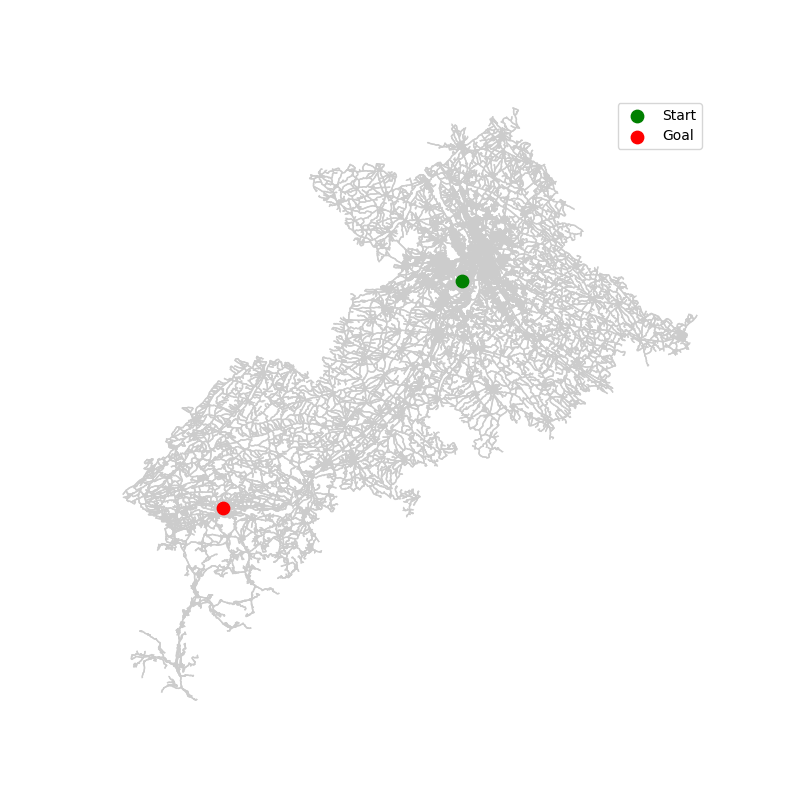

In [18]:
plt.close('all')

print("Chargement du graphe")

# Active le mode interactif pour permettre de modifier la carte plus tard dans le code

plt.ion()
# Dessine la carte
fig, ax = osmnx.plot_graph(
    G, show=False, close=False, node_size=0, edge_color="#CCCCCC", bgcolor="white"
)

# Surligne les nœuds de départ et d'arrivée
ax.scatter(*node_positions[orig_node], c="green", s=80, zorder=5, label="Start")
ax.scatter(*node_positions[dest_node], c="red", s=80, zorder=5, label="Goal")

print("Exécution de A*")
plt.legend()
plt.show()

# Lance l'algorithme
path = astar_visual(G, orig_node, dest_node)

# Dessine le chemin final
if path:
    x_vals = [node_positions[n][0] for n in path]
    y_vals = [node_positions[n][1] for n in path]
    ax.plot(x_vals, y_vals, c="green", lw=3, zorder=6, label="Final Path")
    ax.legend()
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
else:
    print("No path found.")

### Le problème de A*

Aujourd'hui, avec la croissance continue de la population humaine, les réseaux routiers se complexifient de plus en plus, des routes ne cessent d'être construites, rénovées, agrandies et caetera. De plus, les différents utilisateurs d'outils de cartographie à des fins de planifications d'itinéraires, particuliers, entreprises ou même états, sont de plus en plus exigent. Il ne s'agit plus de trouver le chemin le plus court, mais aussi le plus rapide, le moins polluant, qui ne passe par les péages, qui ne passes pas par les Zone Faible Emission, et bien d'autre critères qui continuent d'apparaître. Faire tourner l'algorithme A* sur la région Occitanie, en regardant uniquement la distance, est suffisant pour mettre en difficulté des ordinateurs avec des CPU plutôt récent et 16GB de mémoire RAM (nous avons essayé sans succès), il en va sans dire que des serveurs qui doivent gérer des millions de requête simultanément à l'échelle d'un pays, voir plus parfois, ce n'est pas envisageable.

Il existe bien des astuces pour limiter un maximum les traitements, mais A* n'est déjà plus à la hauteur depuis bien longtemps. Ou en tout cas, pas sans une petite amélioration, simple, mais terriblement efficace.


## HPA*

### Présentation et explication

HPA*, ou "Hierarchical Pathfinding A*", soit "A* Hiérarchique", est une amélioration de A* lorsqu'il s'agit de traiter des volumes de données conséquentes.

Cette amélioration consiste à réduire le volume de données à traiter et à appliquer A* de manière classique sur ces données moins précises. Une analogie serait de se dire "Je souhaite aller de Toulouse vers Paris, je vais dessiner un itinéraire sur ma carte. Mais avant de me demander quelle routes j'emprunte, je vais regarder par quelles villes je passe". 
On a donc hierarchisé le problème, "avant d'aller dans le détail, je vais dégrossir", c'est exactement le fonctionnement d'HPA*. Lorsque le volume de données (noeuds et chemins) est trop important, on le réduit en regroupant dans un unique noeud une grosse portion de la carte. Selon le nombre de données à traiter, il peut être pertinent de réappliquer cette stratégie à plusieurs reprises afin d'éviter que chaque sous-graphe contenu dans un noeud soit trop important tout en réduisant suffisament le nombre de données à traiter.

Nous avons donc un graphe bien moins lourd à traiter, on applique A* sur ce graphe. Mais et alors ? Je ne sais toujours pas quelle route emprunté pour faire Toulouse-Montaubant ?
Et bien désormais, on a une listes de noeuds "utiles", on sait qu'on ne passera par aucun autre sous-graphe. On peut donc les oublier. On développe tout les sous-graphe utile, et on recommence. On répète l'opération jusqu'à savoir quelle route exactement on emprunte.

Cela peut sembler contre-intuitif de rajouter autant de surcouche de traitement, mais la quantité de données à ne pas charger sur la machine et à ne pas traiter par l'algorithme grâce à cette stratégie est telle que le jeu en vaut largement la chandelle.

### Comparaison

Malgré tout, A* garde encore certains arguments. Voici donc un tableau qui récapitule les principales différences entre les deux algorithmes. Ici, on prend des valeurs estimées sur une machine de qualité correcte. (calculs de temps estimés fournis par ChatGPT.) Dans notre cas, les données utilisées sont celles d'OSM sur la france entière.

| Critère                                 | A* classique                                | HPA* (A* hiérarchique)                         |
|-----------------------------------------|---------------------------------------------|------------------------------------------------|
| **Prétraitement initial**               | Aucun                                       | Construction hiérarchique : 10 s – 10 min      |
| **Chargement + parsing OSM**            | 0,5 – 5 min                                 | 0,5 – 5 min                                    |
| **Mémoire nécessaire**                  | 16–32 Go RAM Uniquement                     | 16–32 Go Grande partie en HDD/SSD              |
| **Temps de recherche (Paris→Toulouse)** | 0,5 – 60 s (typique : 1–10 s)               | 0,05 – 1 s (souvent < 1 s)                     |
| **Nœuds explorés**                      | Très élevé (corridor large)                 | Fortement réduit grâce aux “super-nœuds”       |
| **Adapté aux nombreuses requêtes ?**    | Non (temps ≈ proportionnel à la taille)     | Oui (prétraitement amorti dès quelques routes) |
| **Scalabilité carte très grande**       | Mauvaise                                    | Excellente                                     |
| **Avantage majeur**                     | Simplicité de mise en œuvre                 | Accélération ×5 à ×50 par requête              |
| **Inconvénient majeur**                 | Temps de recherche et RAM élevés            | Prétraitement initial obligatoire              |

Ici, on voit clairement la différence. A* est utile pour du traitment unique, on lui fait manger une petit quantité de données, il les traite plutôt rapidement, et fournit un résultat. 
En revanche HPA* est réutilisable, on lui donne une grosse quantité de données, il les traîte une première fois, ce qui prend du temps, mais ensuite on peut lui demander le chemin que l'on souhaite parmi ces données, et il répondra plus rapidement qu'A*. 
Il s'agit de comparer une courbe exponentielle à une courbe logarithmique : à petite échelle et peu d'utilisations, A* est plus intéressant. Mais dès qu'on augmente la taille des données et le nombre d'utilisations, la supériorité d'HPA* devient écrasante, et aujourd'hui, la recherche de chemin est devenue si complexe et quotidienne, qu'il est évident qu'A* n'est plus adapté.

### Compresser les données

Nous n'avons pas encore détaillé quelques points sur la réduction de ces données. Notamment les chemins qui permettent de relier nos supers noeuds.

En réalité ce n'est pas si compliqué que cela, on prend tout les liens qui sortent d'un super noeud, et on s'en sert pour relier ce dernier aux autres super noeuds. Ici il y a un choix à faire, dépendant de ce que l'on veut. Il faut bien donner une valeur à ces nouveaux chemins. Cependant plus le sous-graphe est grand, plus ces chemins risquent d'être imprécis. Si on prend le chemin le plus court, ce n'est pas forcément le chemin par lequel on risque de passer en réalité, ce qui peut biaiser l'algorithme. Et le risque est le même dans l'autre sens. Il peut y avoir plein de stratégies pour contrer cet effet. De la même manière que votre GPS vous propose deux ou trois chemins similaires, nos sous-traitement peut faire de même pour éviter d'exclure trop vite des sous-graphes qui pourraient-être utiles.

## Conclusion

De tout temps, l'Homme a eu besoin de trouver son chemin. C'est une telle essence de la vie que même de nombreux animaux en sont capable. Il suffit de regarder les vols migratoires et leur précision pour le comprendre.
Mais pour l'humain, avec le temps cette compétence est devenue de plus en plus complexe et complète, cela a demandé toujours plus de savoirs et de techniques. De simple instincts, nous avons développés des dessins, puis des cartes. De simples instincts nous avons développés des réseaux logiques et intuitifs, des techniques, puis des algorithmes. De simples instincts, nous avons développé des tracés, puis des ordinateurs. Le problème est resté le même depuis toujours, mais il est de plus en plus gourmand sur les ressources requises. L'évolution des algorithmes n'est que la conséquence moderne de ce problème qu'est la recherche du plus court chemin. Et peut-être que ces algorithmes seront rendus obsolètes par l'apparition de nouvelles technologies.

## Ouverture

Ici, nous avons récapituler "au plus court chemin" l'utilité de ces algorithmes. Dans la réalité, il y a bien plus de critères qui doivent être traitées. Et il y a plein d'astuces utilisés par les divers fournisseurs de service comme Google Maps ou Waze par exemple, afin de réduire le temps de traitement au maximum et prendre en compte les intérêts de chaque utilisateur (prix du trajet, péages, type de routes etc...) et mettre à jour l'itinéraire au fur et à mesure (on a tous raté notre sortie en voulant suivre le GPS). Ces améliorations plus poussées et spécifiques demandent une recherche autre sur le sujet. On peut rapprocher ça à FlopEDT, qui ne se contente pas de chercher "l'emploi du temps qui fonctionne avec le moins de trous" mais aussi de prendre en compte les préférences de chacun et de permettre les mise à jour à la main. Une recette très maligne qui est publique chez flop, mais pour les géants du gps, ce sont des recettes dont certains ingrédients sont bel et bien gardé secrets.